# MAKE THE IMPORTS

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## READ THE CSV FROM SOURCE 

In [15]:
# we read the data from the csv file 
df = pd.read_csv('C:/Users/muson/Documents/internship/projects/Data-Processing/movies.csv/movies.csv')

## CHECK FOR MISSING VALUES 

In [16]:
df.isna().sum()

name           0
rating        52
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

## PERFORME THE CLEAN UP
THIS REOMEVES THE MISSING VALUES FROM NON NUMERICAL VALUES AND IT POPULATES THE MISSING NUMERICAL VALUES WITH THE MEAN VALUE AND IT FILLS THE CATEGORICAL DATA WITH THE MOST COMMON AND SKIPS NON CATEGORICAL DATA

In [17]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer instances with different strategies
imputer_mean = SimpleImputer(strategy="mean")
imputer_most_frequent = SimpleImputer(strategy="most_frequent")

# Impute missing values based on data type
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = imputer_mean.fit_transform(df[[column]]).ravel()
    elif df[column].dtype == 'object':
        df[column] = imputer_most_frequent.fit_transform(df[[column]]).ravel()
    else:
        # Skip columns with non-numeric or non-categorical data
        continue




## CHECK IF THERE ARE STILL MISSING DATA 

In [5]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
# correcting the year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [7]:
#to display all rows
pd.set_option('display.max_rows',None)


In [8]:
# drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


# looking at correlation

In [9]:
# lets start looking at correlation
df.corr(numeric_only=True, method = 'pearson')  # three method person, kendall,spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766,0.996802
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329,0.106144
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166,0.218229
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287,0.259488
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335,0.245408
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000,0.120577
yearcorrect,0.996802,0.106144,0.218229,0.259488,0.245408,0.120577,1.000000


# DRAWING A HEAT MAP

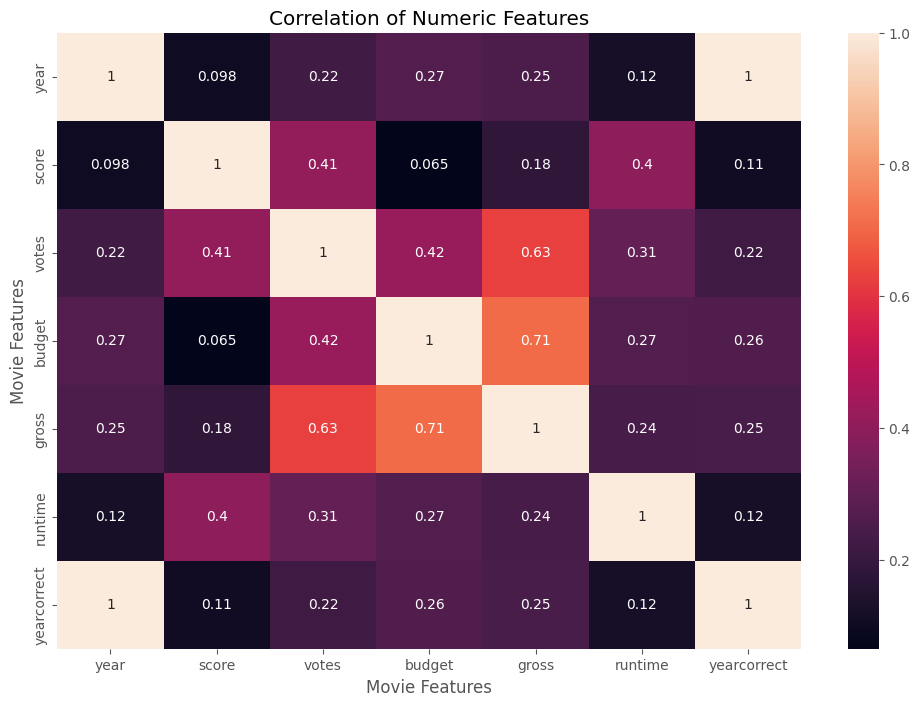

In [10]:
correlation_matrix = df.corr(numeric_only=True, method = 'pearson') 
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# Scatter Plot with Regression Line: ON BUDGET AND GROSS 

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Budget vs. Gross Earnings')

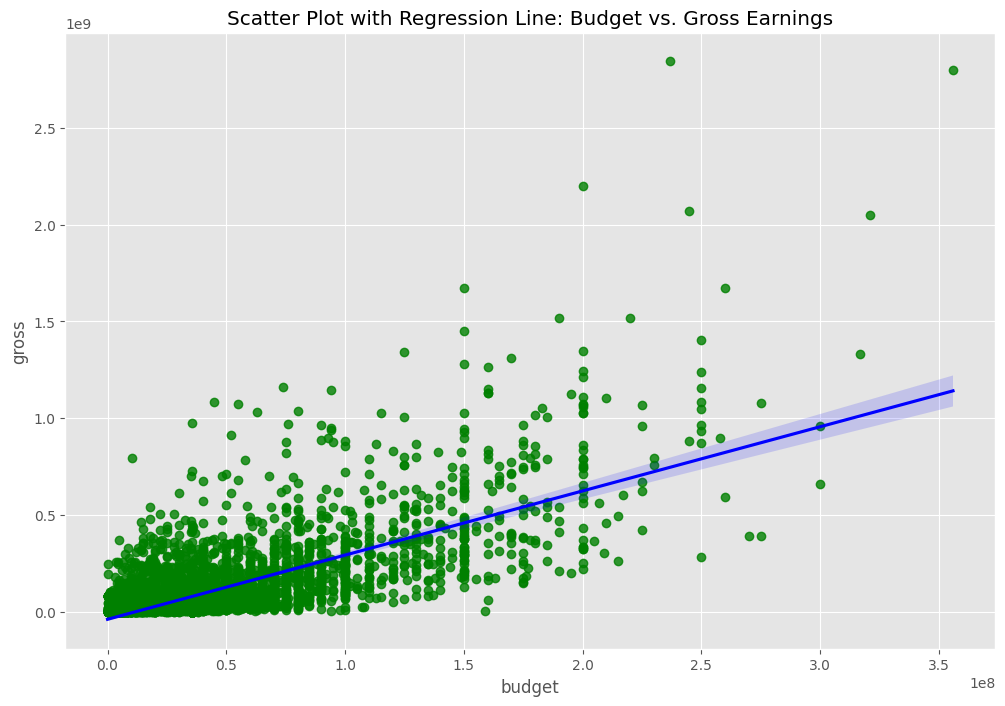

In [11]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget', 
            y = 'gross', 
            data= df , 
            scatter_kws = {'color': 'green'}, 
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Budget vs. Gross Earnings')

# Scatter Plot with Regression Line: ON VOTES AND GROSS 

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Votes vs. Gross Earnings')

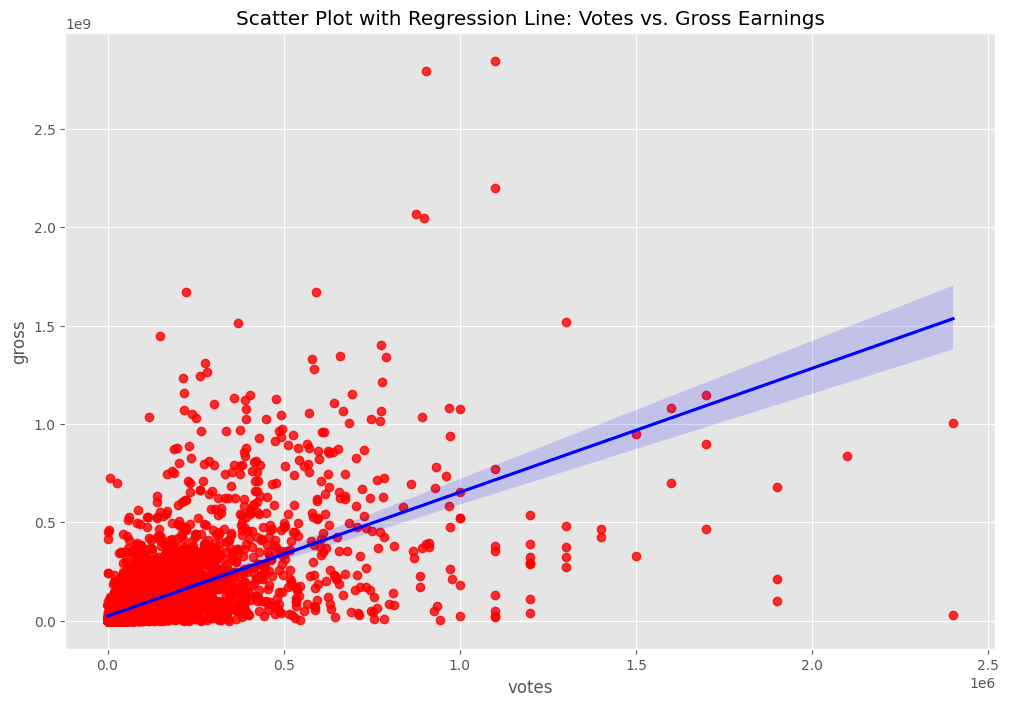

In [12]:
# plot votes vs gross using seaborn
sns.regplot(x = 'votes', 
            y = 'gross', 
            data= df , 
            scatter_kws = {'color': 'red'}, 
            line_kws = {'color': 'blue'})

plt.title('Scatter Plot with Regression Line: Votes vs. Gross Earnings')

# SAVING THE PROCESSED DATA TO A CSV FILE

In [13]:
#SAVING THE DATA
df.to_csv('C:/Users/muson/Documents/internship/projects/Data-Processing/movies.csv/movies_cleaned.csv', index = False)

# AUTOMATING THE WHOLE PROCESS

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Function Definitions


def save_dataframe_to_csv(df, file_name):
    try:
        df.to_csv(file_name, index=False)
        print("DataFrame saved successfully.")
    except Exception as e:
        print("Error:", e)


def check_missing_values(df):
    for column in df.columns:
        missing_values = df[column].isna().sum()
        if missing_values > 0:
            print(f'{column} has {missing_values} missing values.')
        else:
            print(f'{column} has no missing values.')


def clean_data(df):
    imputer_mean = SimpleImputer(strategy="mean")
    imputer_most_frequent = SimpleImputer(strategy="most_frequent")

    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = imputer_mean.fit_transform(df[[column]]).ravel()
        elif df[column].dtype == 'object':
            df[column] = imputer_most_frequent.fit_transform(df[[column]]).ravel()
        else:
            continue

    return df


def remove_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df


def calculate_summary_statistics(data):
    mean_value = data.mean()
    median_value = data.median()
    std_deviation = data.std()
    
    return mean_value, median_value, std_deviation


def filter_data(data, column, criteria):
    filtered_data = data[data[column] == criteria]
    return filtered_data


def generate_histogram(data, column):
    plt.hist(data[column], bins=10, alpha=0.7, color='blue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(column))
    plt.show()


def generate_bar_chart(data, column):
    data_counts = data[column].value_counts()
    data_counts.plot(kind='bar', color='green')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Bar Chart of {}'.format(column))
    plt.show()


def generate_scatter_plot(data, x, y):
    plt.scatter(data[x], data[y], color='purple')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter Plot: {} vs. {}'.format(x, y))
    plt.show()


def generate_heat_map(data):
    correlation_matrix = data.corr(numeric_only=True, method='pearson')
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Correlation of Numeric Features')
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.show()


def main():
    file_path = pd.read_csv('C:/Users/muson/Documents/internship/projects/Data-Processing/movies.csv/movies.csv')
    df = file_path
    if file_path is not None:
        print("CSV file loaded successfully.")
        while True:
            print("\nChoose an option:")
            print("1. Check missing values")
            print("2. Clean data")
            print("3. Remove duplicates")
            print("4. Calculate summary statistics")
            print("5. Filter data")
            print("6. Generate histogram")
            print("7. Generate bar chart")
            print("8. Generate scatter plot")
            print("9. Generate heat map")
            print("10. Save DataFrame to CSV")
            print("11. Exit")

            choice = input("Enter your choice: ")
            if choice == '1':
                check_missing_values(df)
            elif choice == '2':
                df = clean_data(df)
                print("Data cleaned successfully.")
            elif choice == '3':
                df = remove_duplicates(df)
                print("Duplicates removed successfully.")
            elif choice == '4':
                column = input("Enter the column name to calculate summary statistics: ")
                mean, median, std = calculate_summary_statistics(df[column])
                print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std}")
            elif choice == '5':
                column = input("Enter the column name to filter data: ")
                criteria = input("Enter the filter criteria: ")
                filtered_data = filter_data(df, column, criteria)
                print(filtered_data)
            elif choice == '6':
                column = input("Enter the column name to generate histogram: ")
                generate_histogram(df, column)
            elif choice == '7':
                column = input("Enter the column name to generate bar chart: ")
                generate_bar_chart(df, column)
            elif choice == '8':
                x = input("Enter the x-axis column name: ")
                y = input("Enter the y-axis column name: ")
                generate_scatter_plot(df, x, y)
            elif choice == '9':
                generate_heat_map(df)
            elif choice == '10':
                file_name = input("Enter the file name to save the DataFrame (e.g., 'output.csv'): ")
                if not file_name.endswith('.csv'):
                    file_name += '.csv'
                save_dataframe_to_csv(df, file_name)
            elif choice == '11':
                print("Exiting program...")
                break
            else:
                print("Invalid choice. Please enter a valid option.")


if __name__ == "__main__":
    main()

